In [ ]:
# PCA - dimensionality reduction
# then supervised
# 
# 4ml
#
# jrgp
# 

In [ ]:
#
# 0. libs 
#

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
#
# 1. load
#

from sklearn import datasets
dataset = datasets.load_wine()


In [ ]:
#
# 2. ETL 
#

X = dataset.data
y = dataset.target

In [ ]:
#
# Splitting the X and Y into the
# 

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [ ]:
#
# 2. ETL 
#

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [ ]:
#
# 6. pca - reduce dimensionality
#


from sklearn.decomposition import PCA
pca = PCA(n_components = 2)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

explained_variance = pca.explained_variance_ratio_


In [ ]:
#
# 6. create Logistic Regression model
#

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)



In [ ]:
#
# 6. train model
#

classifier.fit(X_train, y_train)


LogisticRegression(random_state=0)

In [ ]:
#
# 9. predict
#
y_pred = classifier.predict(X_test)


In [ ]:
#
# 7. evaluate
#

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)


In [ ]:
#
# exercise for students 
# vis - confusion_matrix
# 

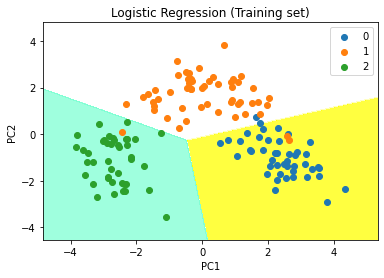

In [ ]:
#
# 7. vis - predicting the training set
#

from matplotlib.colors import ListedColormap

X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
					stop = X_set[:, 0].max() + 1, step = 0.01),
					np.arange(start = X_set[:, 1].min() - 1,
					stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),
			X2.ravel()]).T).reshape(X1.shape), alpha = 0.75,
			cmap = ListedColormap(('yellow', 'white', 'aquamarine')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
	plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], label = j)#,c = ListedColormap(('red', 'green', 'blue'))(i))

plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1') 
plt.ylabel('PC2') 
plt.legend() 
plt.show()
print()


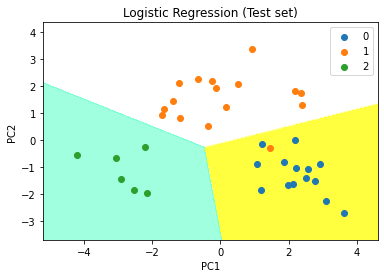

In [ ]:
#
# 7. vis - predicting the test set
#

from matplotlib.colors import ListedColormap

X_set, y_set = X_test, y_test

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
					stop = X_set[:, 0].max() + 1, step = 0.01),
					np.arange(start = X_set[:, 1].min() - 1,
					stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),
			X2.ravel()]).T).reshape(X1.shape), alpha = 0.75,
			cmap = ListedColormap(('yellow', 'white', 'aquamarine')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
	plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],label = j)#c = ListedColormap(('red', 'green', 'blue'))(i), 

plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1') 
plt.ylabel('PC2') 
plt.legend()
plt.show()
